## Importing Libraries and Files

In [1]:
#import Pandas, NumPy, and Matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

#Import data file
df = pd.read_csv(r'C:\Users\jesst\OneDrive\Desktop\Capstone\2022 pers QBE.csv')

## Checking Data Types and Checking for Null Values

In [2]:
#Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Calc YR Salary             1593 non-null   object
 1   Yearly PERS Contributions  1593 non-null   object
 2   Age                        1593 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 37.5+ KB


In [3]:
#Check data to see how many tuples have a null value
df.isna().sum()

Calc YR Salary               0
Yearly PERS Contributions    0
Age                          0
dtype: int64

## Cleaning The Data

In [4]:
#Convert data in columns from string to float
cleaned_data = (df[['Age', 'Calc YR Salary', 'Yearly PERS Contributions']].replace( '[\$,) ]+','',regex=True ).replace( '[(]','-',regex=True ).astype(float))
cleaned_data.head()

,Age,Calc YR Salary,Yearly PERS Contributions
0,36.0,131820.43,40836.16
1,18.0,70699.09,21899.79
2,26.0,119490.28,37012.20
3,38.0,126717.01,39203.57
4,61.0,125525.01,38790.15


## Splitting The Columns of Data Into Separate Data Sets To Create Descriptive Graphs

In [5]:
#Split data columns into separate data files for plotting
age = cleaned_data.loc[:, 'Age'].values
yr_salary = cleaned_data.loc[:, 'Calc YR Salary'].values
pers_contributions = cleaned_data.loc[:, 'Yearly PERS Contributions'].values

## Checking For Outlying Data in the Data Sets Using Graphs

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

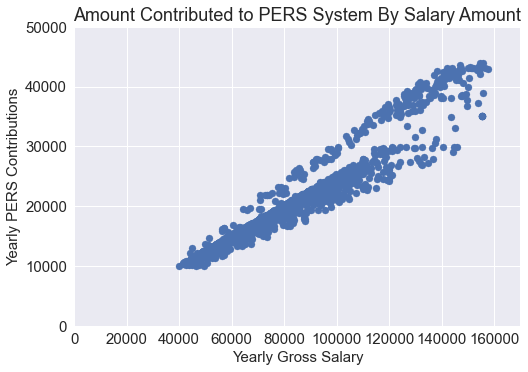

In [6]:
#Create scatter plot showing linear correlation of 'yearly salary' and 'pers contribution' values and evaluation of data points
plt.style.use('seaborn')
plt.scatter(yr_salary, pers_contributions)
plt.xlim(left = 0, right = 170000)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 50000) # <-- changes the graph height
plt.xlabel('Yearly Gross Salary', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Yearly PERS Contributions', fontsize = 15) #<-- changes the graph y label
plt.title('Amount Contributed to PERS System By Salary Amount', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

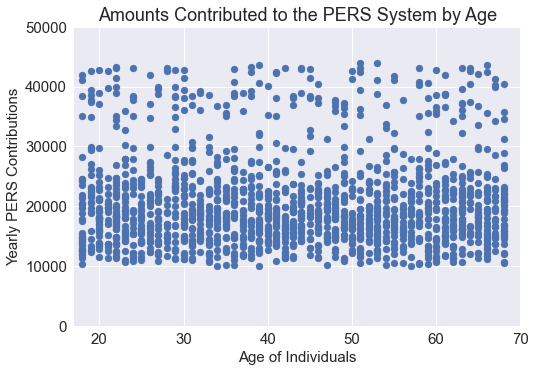

In [7]:
#Create scatter plot showing correlation of 'age' and 'pers contribution' values for evaluation of data points
plt.scatter(age, pers_contributions)
plt.xlim(left = 17, right = 70)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 50000) # <-- changes the graph height
plt.xlabel('Age of Individuals', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Yearly PERS Contributions', fontsize = 15) #<-- changes the graph y label
plt.title('Amounts Contributed to the PERS System by Age', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

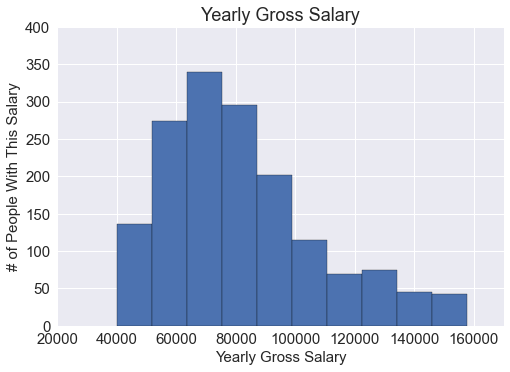

In [8]:
#Create histogram showing 'yearly salary' for evaluation
cleaned_data['Calc YR Salary'].hist(edgecolor = 'black')
plt.xlim(left = 20000, right = 170000)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 400) # <-- changes the graph height
plt.xlabel('Yearly Gross Salary', fontsize = 15) #<-- changes the graph x label
plt.ylabel('# of People With This Salary', fontsize = 15) #<-- changes the graph y label
plt.title('Yearly Gross Salary', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

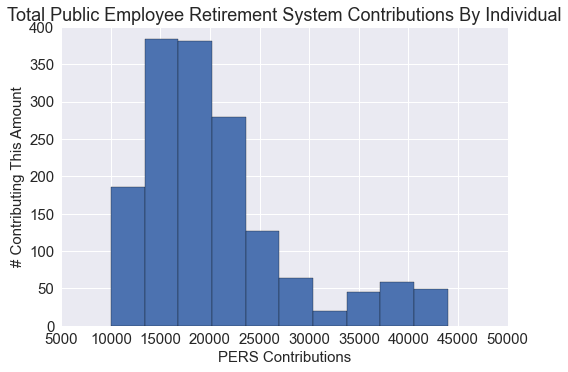

In [9]:
#Create histogram showing 'pers contributions' for evaluation
cleaned_data['Yearly PERS Contributions'].hist(edgecolor = 'black')
plt.xlim(left = 5000, right = 50000)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 400) # <-- changes the graph height
plt.xlabel('PERS Contributions', fontsize = 15) #<-- changes the graph x label
plt.ylabel('# Contributing This Amount', fontsize = 15) #<-- changes the graph y label
plt.title('Total Public Employee Retirement System Contributions By Individual', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

## Split Original Cleaned Data Into Training and Testing Data Sets

In [10]:
#Import the TrainTestSplit class 
from sklearn.model_selection import train_test_split as tts

#Split the data into X and y sets(X = features, y = labels)
X = cleaned_data.drop("Yearly PERS Contributions", axis=1)
y = cleaned_data["Yearly PERS Contributions"]

#Split the data into test and training sets
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

## Creation of the Linear Regression Model and Fitting (Training) the Model

In [11]:
#Import the RandomForestRegressor class
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

In [12]:
#Fit the linear Regression model using the training data
regr.fit(X_train, y_train)

LinearRegression()

## Testing the Data for Accuracy

In [13]:
#Test the RandomForestRegressor model using the test data and get the score
regr.score(X_test, y_test)

0.917578782729508

In [14]:
#Use 'predict' on just the first 10 values in 'X_test' dataset to see what the model gives
results = regr.predict(X_test[:10])
results

array([29879.74888402, 13825.02348515, 19038.31870144, 25643.20809127,
       29471.52728104, 14271.87352001, 36185.99892908, 13048.90124018,
       27752.37696634, 36323.76179791])

## Graphing Results From the Model to Confirm Accuracy 

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

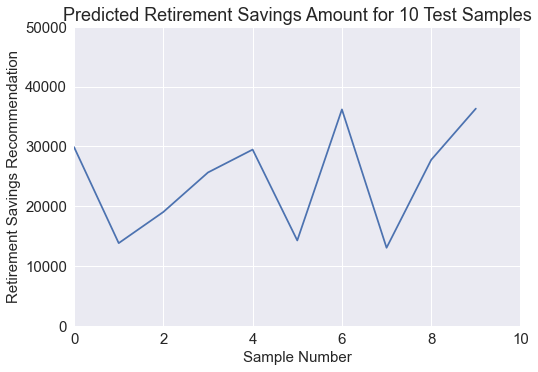

In [15]:
#Create line graph showing 'predict()' values for evaluation
plt.plot(results)
plt.xlim(left = 0, right = 10)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 50000) # <-- changes the graph height
plt.xlabel('Sample Number', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Retirement Savings Recommendation', fontsize = 15) #<-- changes the graph y label
plt.title('Predicted Retirement Savings Amount for 10 Test Samples', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [16]:
#Compare predicted amounts to the truth labels to evaluate the model
y_preds = regr.predict(X_test)
np.array(y_preds)

array([29879.74888402, 13825.02348515, 19038.31870144, 25643.20809127,
       29471.52728104, 14271.87352001, 36185.99892908, 13048.90124018,
       27752.37696634, 36323.76179791, 21675.2332528 , 20818.24459612,
       16368.21070379, 19971.18634354, 23706.51932407, 32794.42511238,
       29537.80006389, 18642.102265  , 15528.07942489, 18151.41740359,
       26628.56887438, 13672.98018688, 18432.06889439, 17989.27708414,
       24792.54565602, 34403.71614996, 24981.25967672, 14576.49268072,
       12293.33076978, 16376.90227739, 41051.09330323, 33859.64872819,
       14419.61768351, 17426.69004948, 39520.41049348, 14011.07488468,
       15966.21403423, 18831.40226549, 11113.20368283, 12360.62766578,
       16263.95690271, 15496.59455361, 16050.20483393, 20164.44789371,
       19033.64408755, 12527.35829336, 20071.41175521, 18621.85847128,
       21108.82263951, 15870.55472295, 19192.56388716, 17046.55360255,
       19050.60725406, 26362.43224051, 15022.21171818, 23124.00357405,
      

In [17]:
#Import 'mean_absolute_error' to evaluate accuracy of the Linear Regression model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

1432.8067012208746

(array([ 5000., 10000., 15000., 20000., 25000., 30000., 35000., 40000.,
        45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

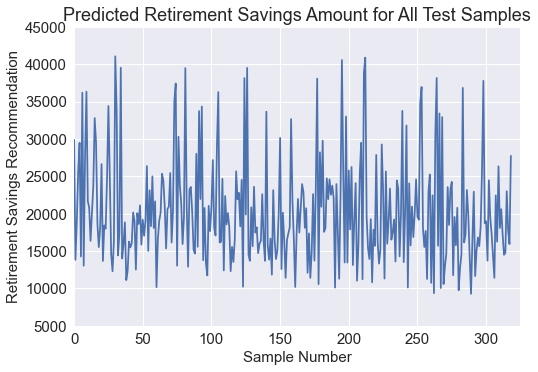

In [18]:
#Create line graph showing 'predict()' values for evaluation, to make sure there are no very low or very high predictions
plt.plot(y_preds)
plt.xlim(left = 0, right = 325)  # <-- changes the graph length
plt.ylim(bottom = 5000, top = 45000) # <-- changes the graph height
plt.xlabel('Sample Number', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Retirement Savings Recommendation', fontsize = 15) #<-- changes the graph y label
plt.title('Predicted Retirement Savings Amount for All Test Samples', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [21]:
# Creation of dependencies file for deployment on Binder
from wand import *

%load_ext watermark

%watermark -v -m -p pandas,numpy,matplotlib,seaborn,pywebio,sklearn,wand

print(" ")
%watermark -u -n -t -z


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

pandas    : 1.4.2
numpy     : 1.21.5
matplotlib: 3.5.1
seaborn   : 0.11.2
pywebio   : 1.6.2
sklearn   : 1.0.2
wand      : 0.6.8

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 12
Architecture: 64bit

 
Last updated: Thu Jul 28 2022 14:51:07Pacific Daylight Time



## User Interface for Interaction With the Linear Regression Model

In [19]:
#Web UI using pywebio
import pywebio
from pywebio.input import *
from pywebio.output import *

def retirement_ui():
    
    #user input fields creation for getting user's 'age' and 'gross yearly salary' values to pass to the predict() function
    age = input("Please enter your age as a number: ", type = NUMBER)
    salary = input("please enter your gross yearly salary as a number: ", type = NUMBER)
    
    age_entry = int(age)
    salary_entry = int(salary)
    data_set = {'col1': [age_entry, salary_entry]}
    entry = pd.DataFrame(data=data_set)
    
    reshaped_entry = entry.to_numpy().T

    #pass user inputs to predict() function
    estimate = regr.predict(reshaped_entry) 
    this_estimate = float(estimate)

    #Output results to the screen
    put_text('The ideal amount for you to put away for retirement each year is: ')
    put_text(this_estimate)
    
retirement_ui()    

SessionClosedException: 